In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_1.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

10/07/2020 17:24:14 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 17:24:24 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 17:24:33 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 17:24:42 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 17:24:51 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.g

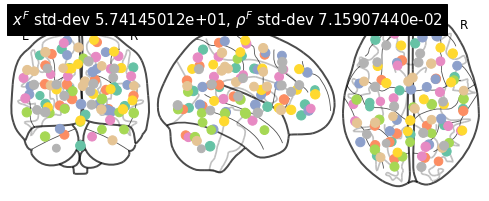

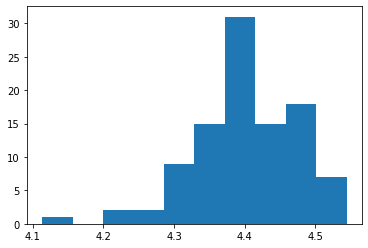

(<nilearn.plotting.displays.OrthoProjector at 0x7f2c500e0d50>,
 tensor([[-42.3451, -23.3632,  10.5034],
         [ 55.8811, -25.5431,  40.1257],
         [ 35.7396, -42.7850,  19.7612],
         [  5.4342,  43.4170,  -9.7287],
         [-10.9935,  -6.0943,  39.5023],
         [-19.4505, -59.9404,  59.4686],
         [  0.2573, -52.5224, -42.1953],
         [ 38.3381, -70.2092,  15.9588],
         [-34.8816, -74.7504,  -1.8194],
         [ 46.8918,   7.8982,  -0.6242],
         [-42.4068, -18.9706,  52.8312],
         [-36.3814,  47.3156,   1.7476],
         [-10.0522,  57.7708,  17.0082],
         [ 27.2992,   6.1734,  16.4214],
         [-21.4860, -60.4520,   0.0945],
         [-14.0253, -51.4386,  22.1564],
         [-29.9722,   4.9017,  54.1719],
         [ 30.0200, -80.6928,  -3.4532],
         [-36.9715, -43.0944,  22.5006],
         [ 56.0855, -27.6393,  10.1136],
         [-16.5835, -78.2001, -30.6864],
         [ 17.6879, -43.1903,  66.6758],
         [ -8.6270,  25.3294,   6.9

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

10/07/2020 17:34:43 [Epoch 1] (17331ms) Posterior free-energy 6.29961114e+10 = KL from prior 1.76474640e+07 - log-likelihood -6.29784740e+10
10/07/2020 17:34:43 Saving checkpoint...
10/07/2020 17:35:01 [Epoch 2] (17269ms) Posterior free-energy 6.11429622e+10 = KL from prior 9.92043100e+06 - log-likelihood -6.11330294e+10
10/07/2020 17:35:17 [Epoch 3] (16432ms) Posterior free-energy 5.96821934e+10 = KL from prior 6.35376250e+06 - log-likelihood -5.96758405e+10
10/07/2020 17:35:34 [Epoch 4] (16428ms) Posterior free-energy 5.86600161e+10 = KL from prior 4.01490775e+06 - log-likelihood -5.86560102e+10
10/07/2020 17:35:50 [Epoch 5] (16472ms) Posterior free-energy 5.79329106e+10 = KL from prior 2.64618175e+06 - log-likelihood -5.79302482e+10
10/07/2020 17:36:07 [Epoch 6] (16464ms) Posterior free-energy 5.74012457e+10 = KL from prior 1.82204150e+06 - log-likelihood -5.73994230e+10
10/07/2020 17:36:23 [Epoch 7] (16444ms) Posterior free-energy 5.69619169e+10 = KL from prior 1.40183725e+06 - log

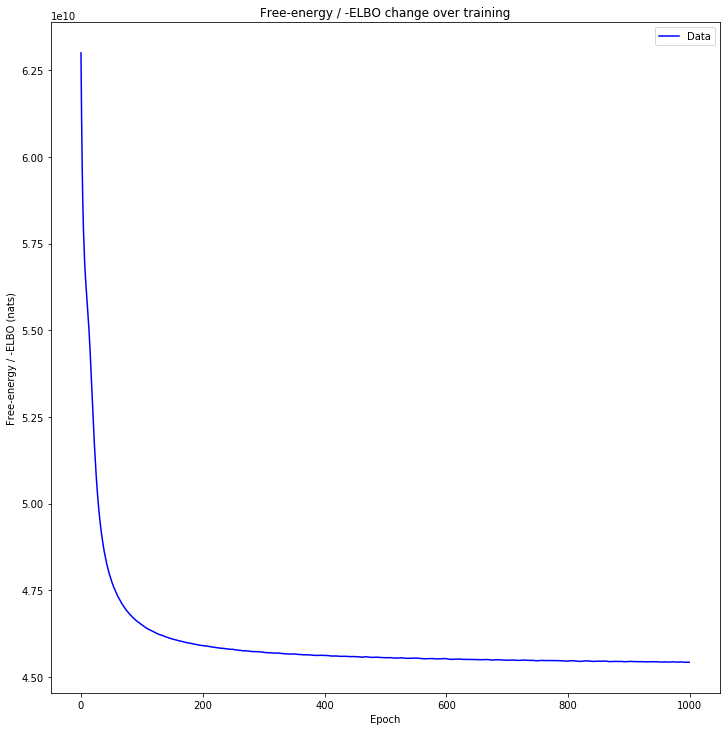

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

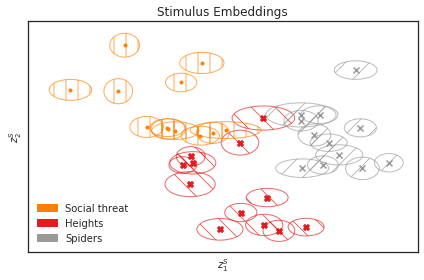

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

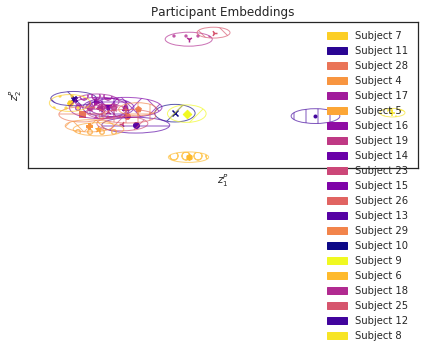

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/07/2020 22:09:11 Plotting factors for Participant 29, run 2


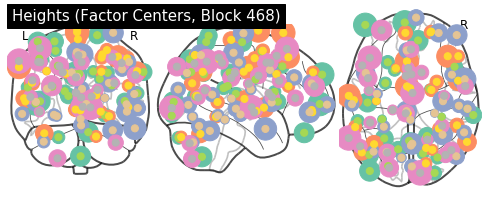

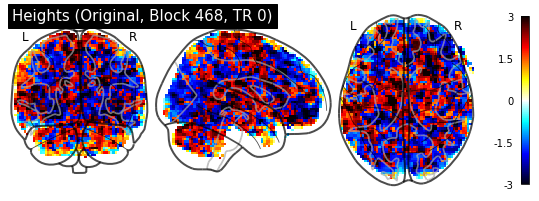

10/07/2020 22:09:16 Reconstruction Error (Frobenius Norm): 1.85426834e+02 out of 1.38664685e+03


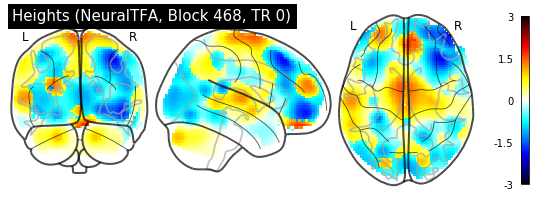

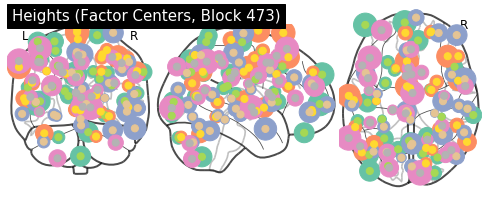

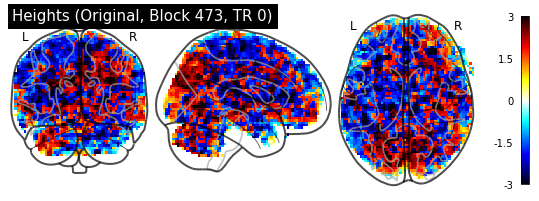

10/07/2020 22:09:20 Reconstruction Error (Frobenius Norm): 1.28077698e+02 out of 1.23012476e+03


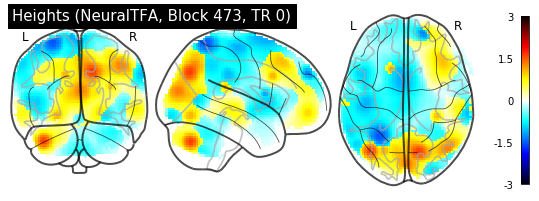

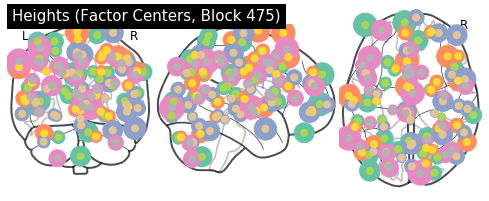

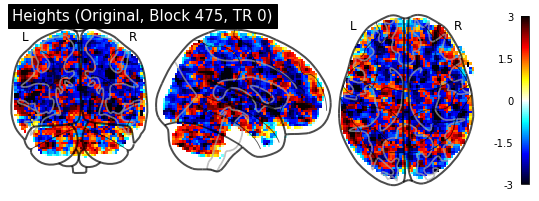

10/07/2020 22:09:24 Reconstruction Error (Frobenius Norm): 1.83480209e+02 out of 1.36970007e+03


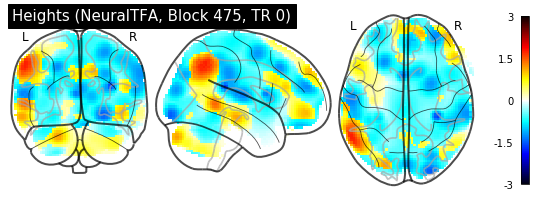

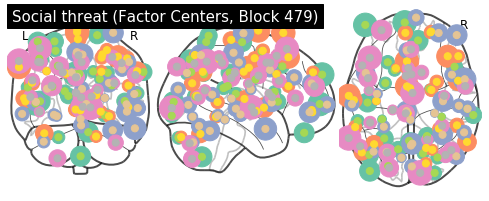

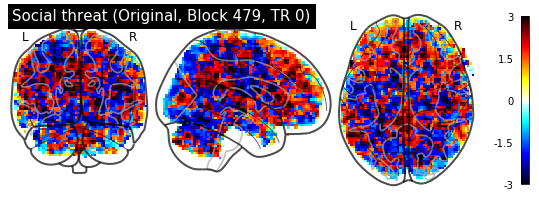

10/07/2020 22:09:29 Reconstruction Error (Frobenius Norm): 1.43150909e+02 out of 1.32856409e+03


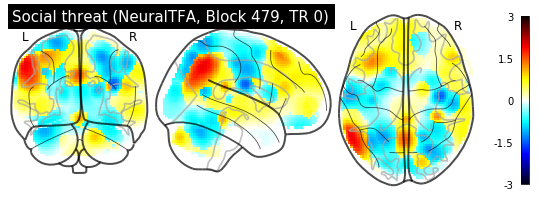

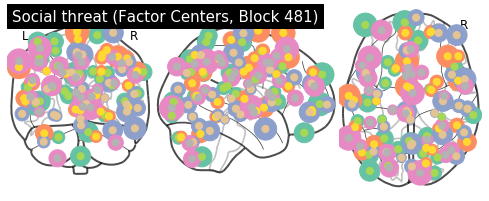

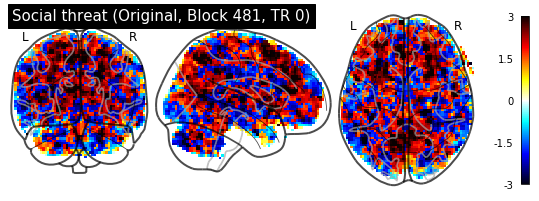

10/07/2020 22:09:33 Reconstruction Error (Frobenius Norm): 1.47721313e+02 out of 1.27971960e+03


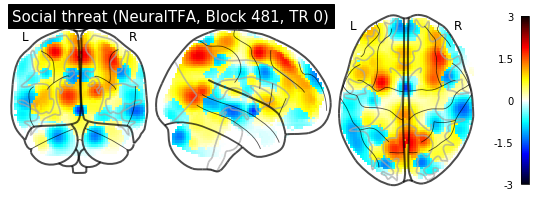

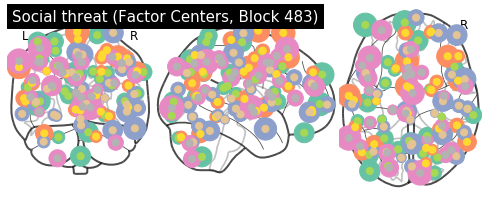

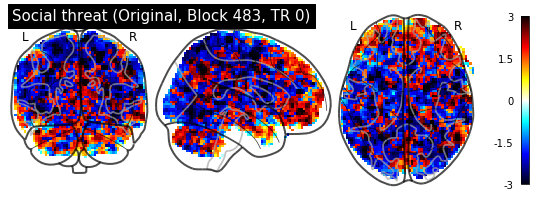

10/07/2020 22:09:38 Reconstruction Error (Frobenius Norm): 1.60415970e+02 out of 1.30207959e+03


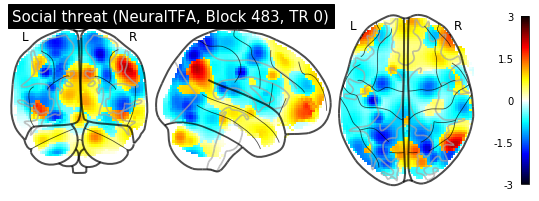

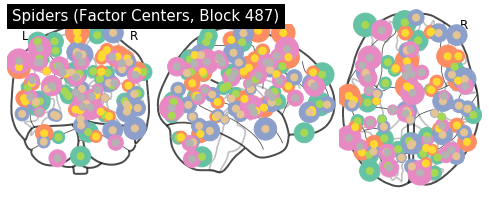

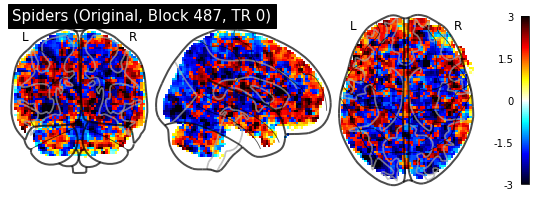

10/07/2020 22:09:42 Reconstruction Error (Frobenius Norm): 1.92515198e+02 out of 1.35214075e+03


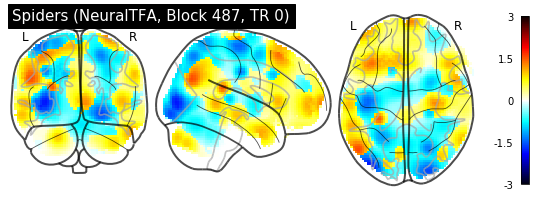

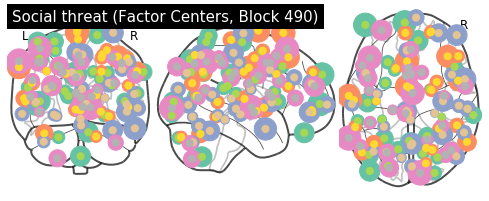

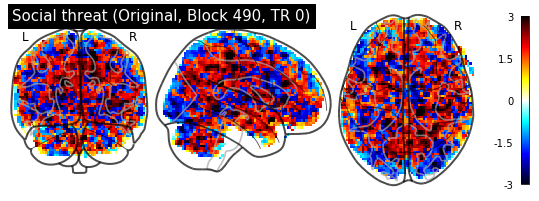

10/07/2020 22:09:47 Reconstruction Error (Frobenius Norm): 2.03583603e+02 out of 1.37990039e+03


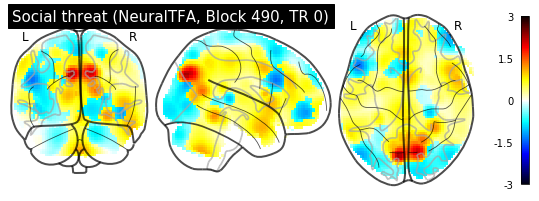

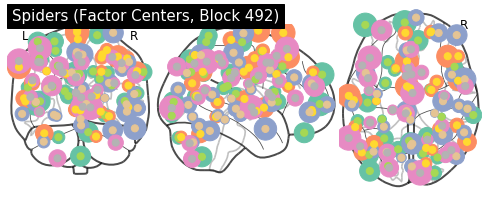

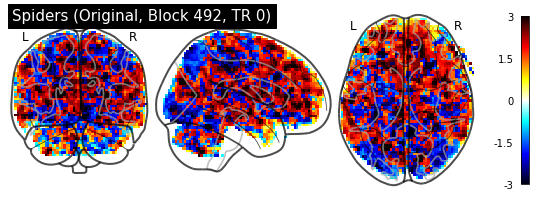

10/07/2020 22:09:51 Reconstruction Error (Frobenius Norm): 1.56948349e+02 out of 1.31164514e+03


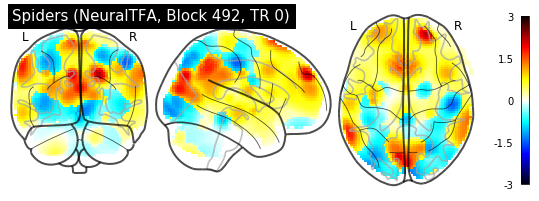

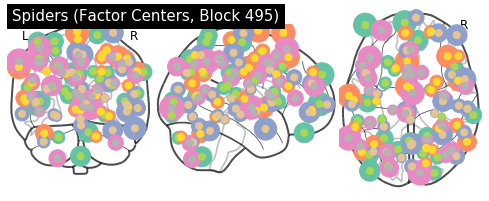

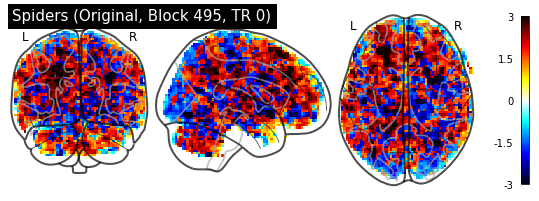

10/07/2020 22:09:56 Reconstruction Error (Frobenius Norm): 1.46362106e+02 out of 1.20293860e+03


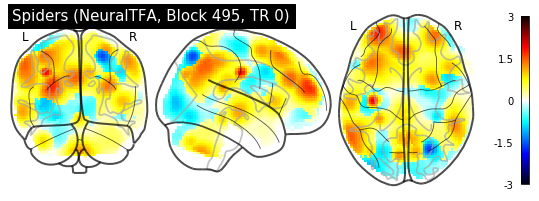

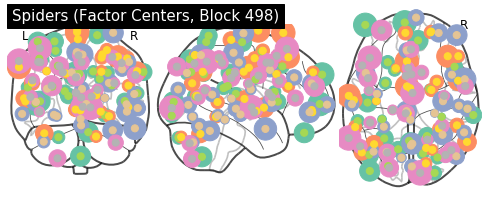

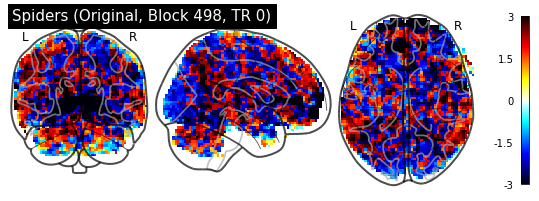

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
10/07/2020 22:10:00 Reconstruction Error (Frobenius Norm): 1.23554077e+02 out of 1.36777209e+03


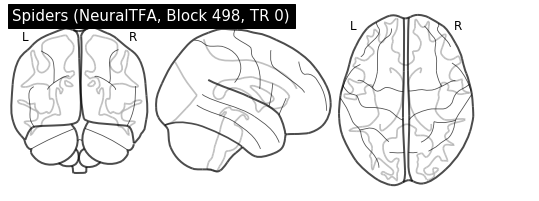

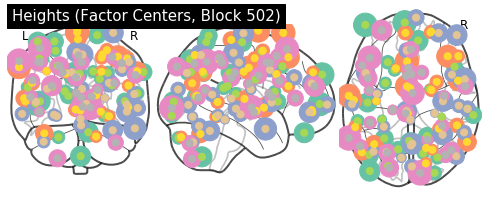

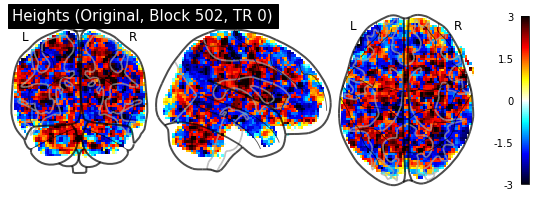

10/07/2020 22:10:05 Reconstruction Error (Frobenius Norm): 1.21349434e+02 out of 1.26623083e+03


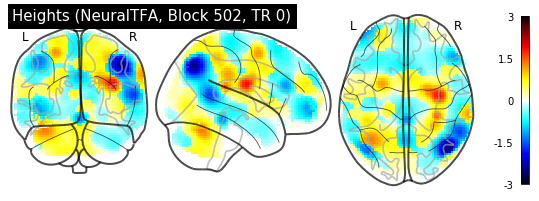

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

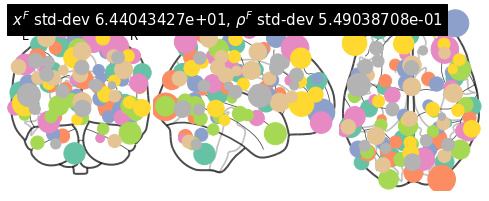

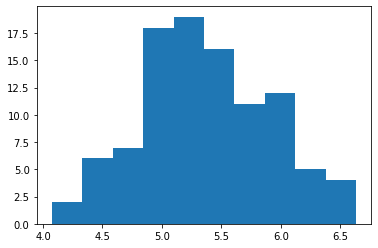

(<nilearn.plotting.displays.OrthoProjector at 0x7f29756379d0>,
 tensor([[-6.2491e+01, -4.4261e+01,  1.3691e+01],
         [ 6.5291e+01, -2.2745e+01,  3.4654e+01],
         [ 3.9376e+01, -4.0457e+01,  1.0633e+01],
         [-1.2144e+00,  5.2209e+01,  3.4725e+00],
         [-2.7462e+01, -3.4033e+00,  3.8503e+01],
         [-2.0757e+01, -7.6099e+01,  6.1772e+01],
         [-5.9403e+00, -5.8434e+01, -5.0315e+01],
         [ 3.6408e+01, -8.1328e+01,  3.4954e+01],
         [-5.0970e+01, -8.1848e+01,  1.5720e+00],
         [ 4.6890e+01,  6.5716e+00,  2.8208e+00],
         [-4.3140e+01, -2.5027e+01,  6.4313e+01],
         [-3.2735e+01,  5.8186e+01,  2.3677e+01],
         [-1.4937e+00,  6.2552e+01,  2.7258e+01],
         [ 1.9419e+01,  5.9406e+00,  1.9242e+01],
         [-2.5424e+01, -6.9626e+01, -1.2369e+01],
         [-1.5229e+01, -6.0453e+01,  1.8063e+01],
         [-2.5915e+01,  3.9928e+00,  6.0438e+01],
         [ 3.3304e+01, -9.9500e+01, -7.0431e-01],
         [-2.9804e+01, -3.6590e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

10/07/2020 22:10:44 Average reconstruction error (MSE): 9.09804671e-01
10/07/2020 22:10:44 Average data norm (Euclidean): 1.00760690e+00
10/07/2020 22:10:44 Percent average reconstruction error: 0.317090


(0.9098046706130497, 1.0076068956685986, 0.0031709021688868656)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

10/07/2020 22:11:22 Average reconstruction error (MSE): 1.17022445e+03 +/- 4.73197017e+01
10/07/2020 22:11:22 Average data norm (Euclidean): 1.29588641e+03 +/- 5.64196993e+01
10/07/2020 22:11:22 Percent average reconstruction error: 90.347881 +/- 2.46370817e+00


(array([1204.51586914, 1121.2722168 , 1205.05725098, 1204.08239746,
        1174.6730957 , 1222.32348633, 1131.17553711, 1197.08129883,
        1171.16552734, 1160.49267578, 1215.19506836, 1234.83679199,
        1138.8927002 , 1200.65612793, 1207.01403809, 1146.98986816,
        1182.3404541 , 1188.13769531, 1181.53137207, 1193.79711914,
        1181.11975098, 1191.90063477, 1173.18408203, 1190.92687988,
        1184.53051758, 1230.33679199, 1151.22253418, 1236.76269531,
        1240.66394043, 1215.6015625 , 1203.09997559, 1178.5880127 ,
        1162.57446289, 1167.76281738, 1166.35119629, 1193.07702637,
        1159.63671875, 1185.89050293, 1163.67858887, 1119.21911621,
        1174.9095459 , 1265.875     , 1168.50219727, 1320.87768555,
        1159.79443359, 1265.23046875, 1306.65637207, 1160.33483887,
        1156.8782959 , 1086.67224121, 1138.97741699, 1198.46618652,
        1160.49621582, 1266.16296387, 1173.61987305, 1198.84887695,
        1168.02429199, 1140.00500488, 1139.51818

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

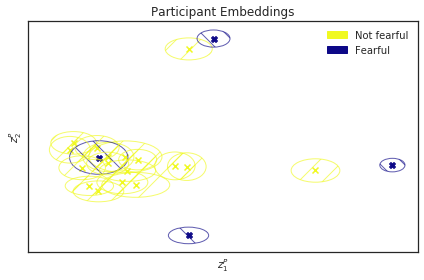

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

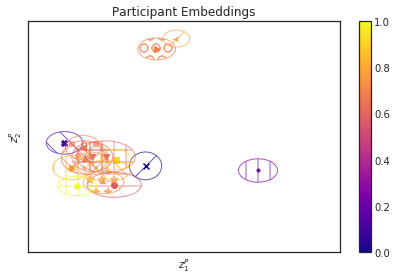

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

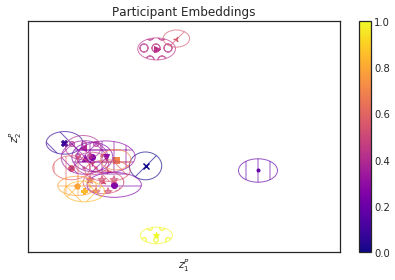

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

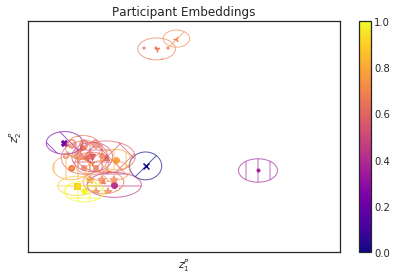

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

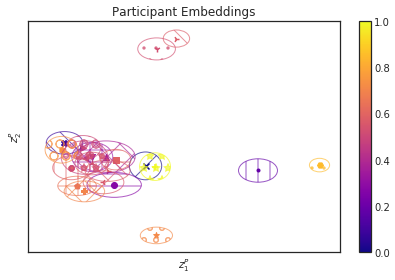

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')